In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Q1
df = pd.read_csv(r"C:\Users\ahmed\Downloads\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.duplicated().sum()

0

<Axes: xlabel='Delivery Time', ylabel='Density'>

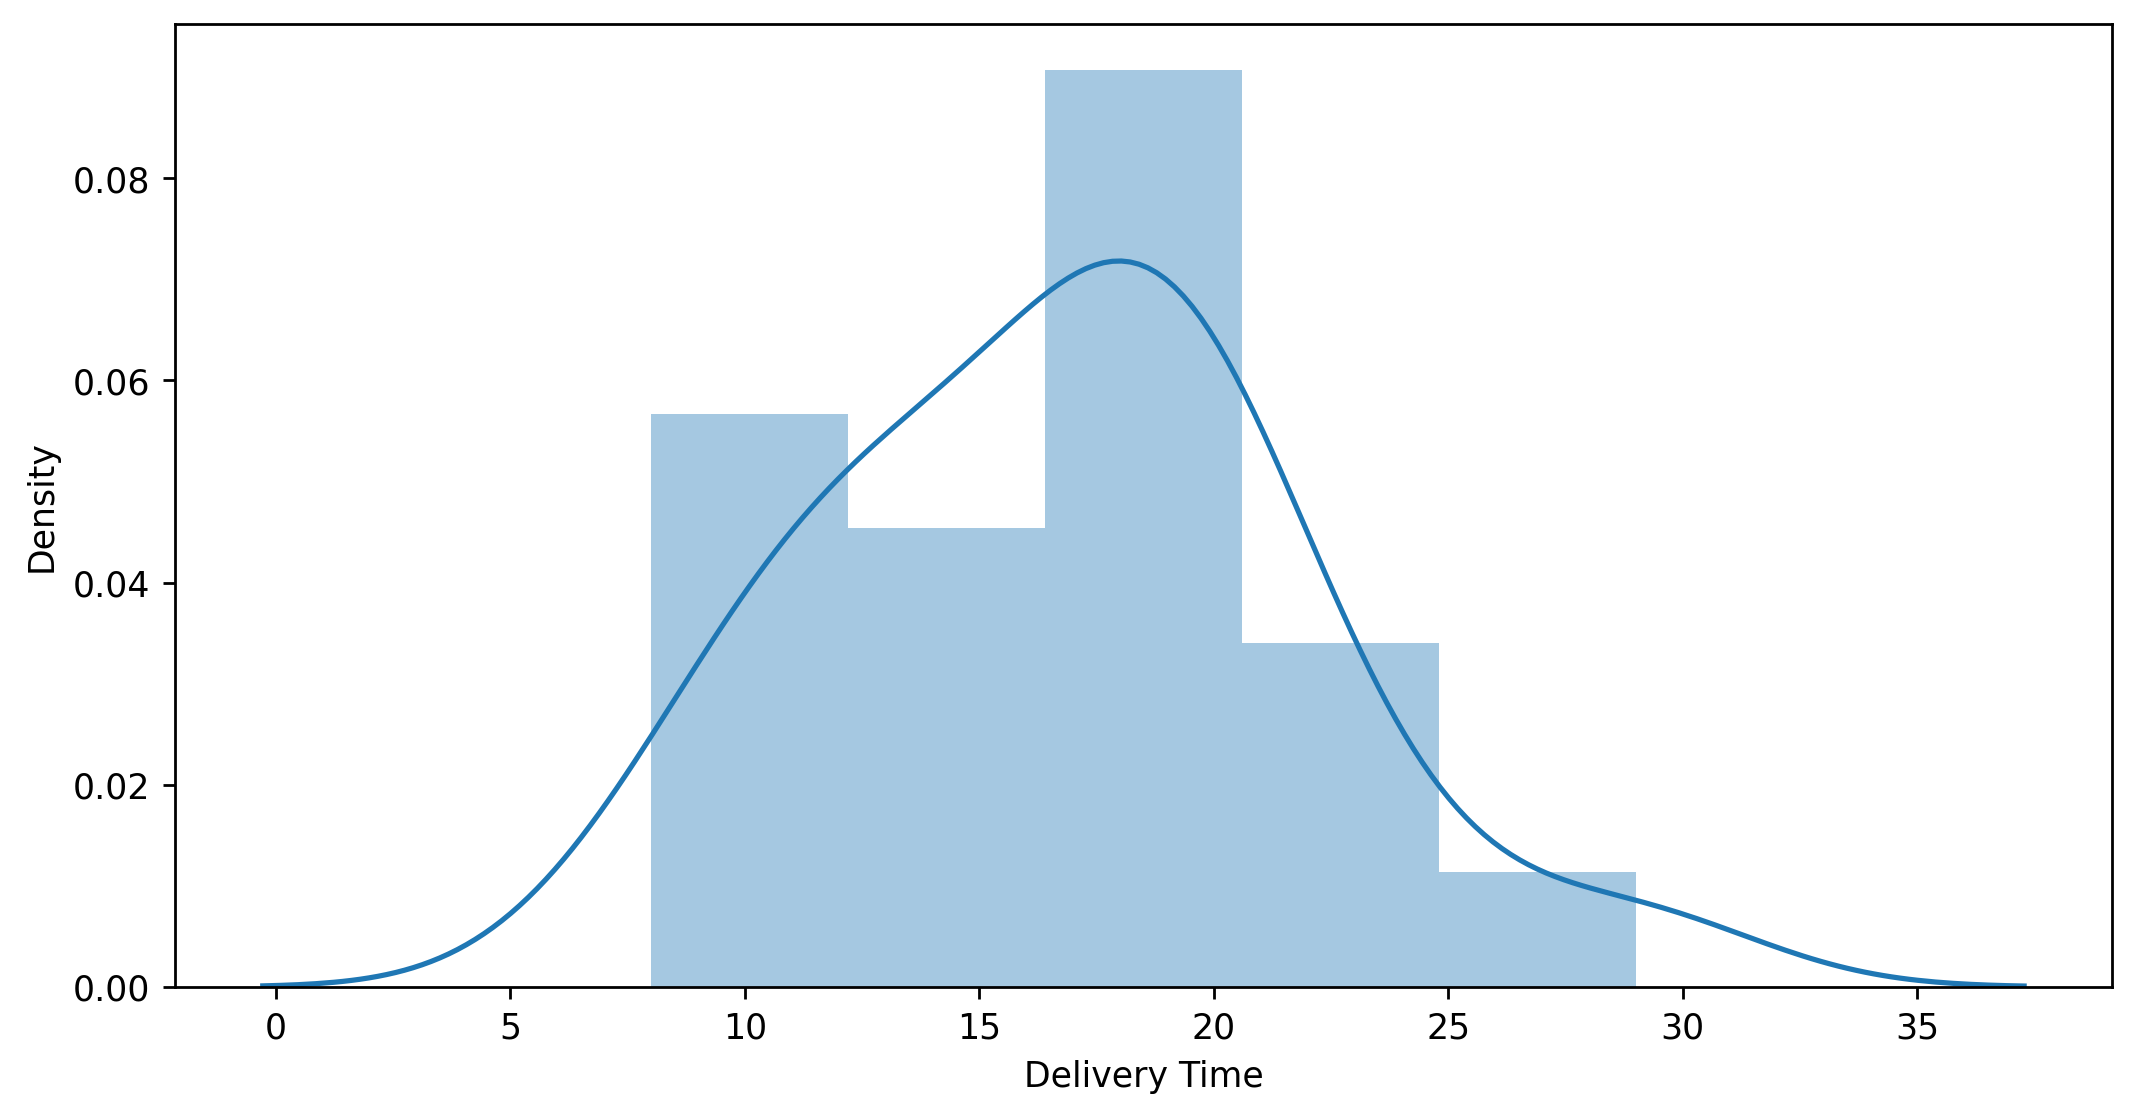

In [6]:
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

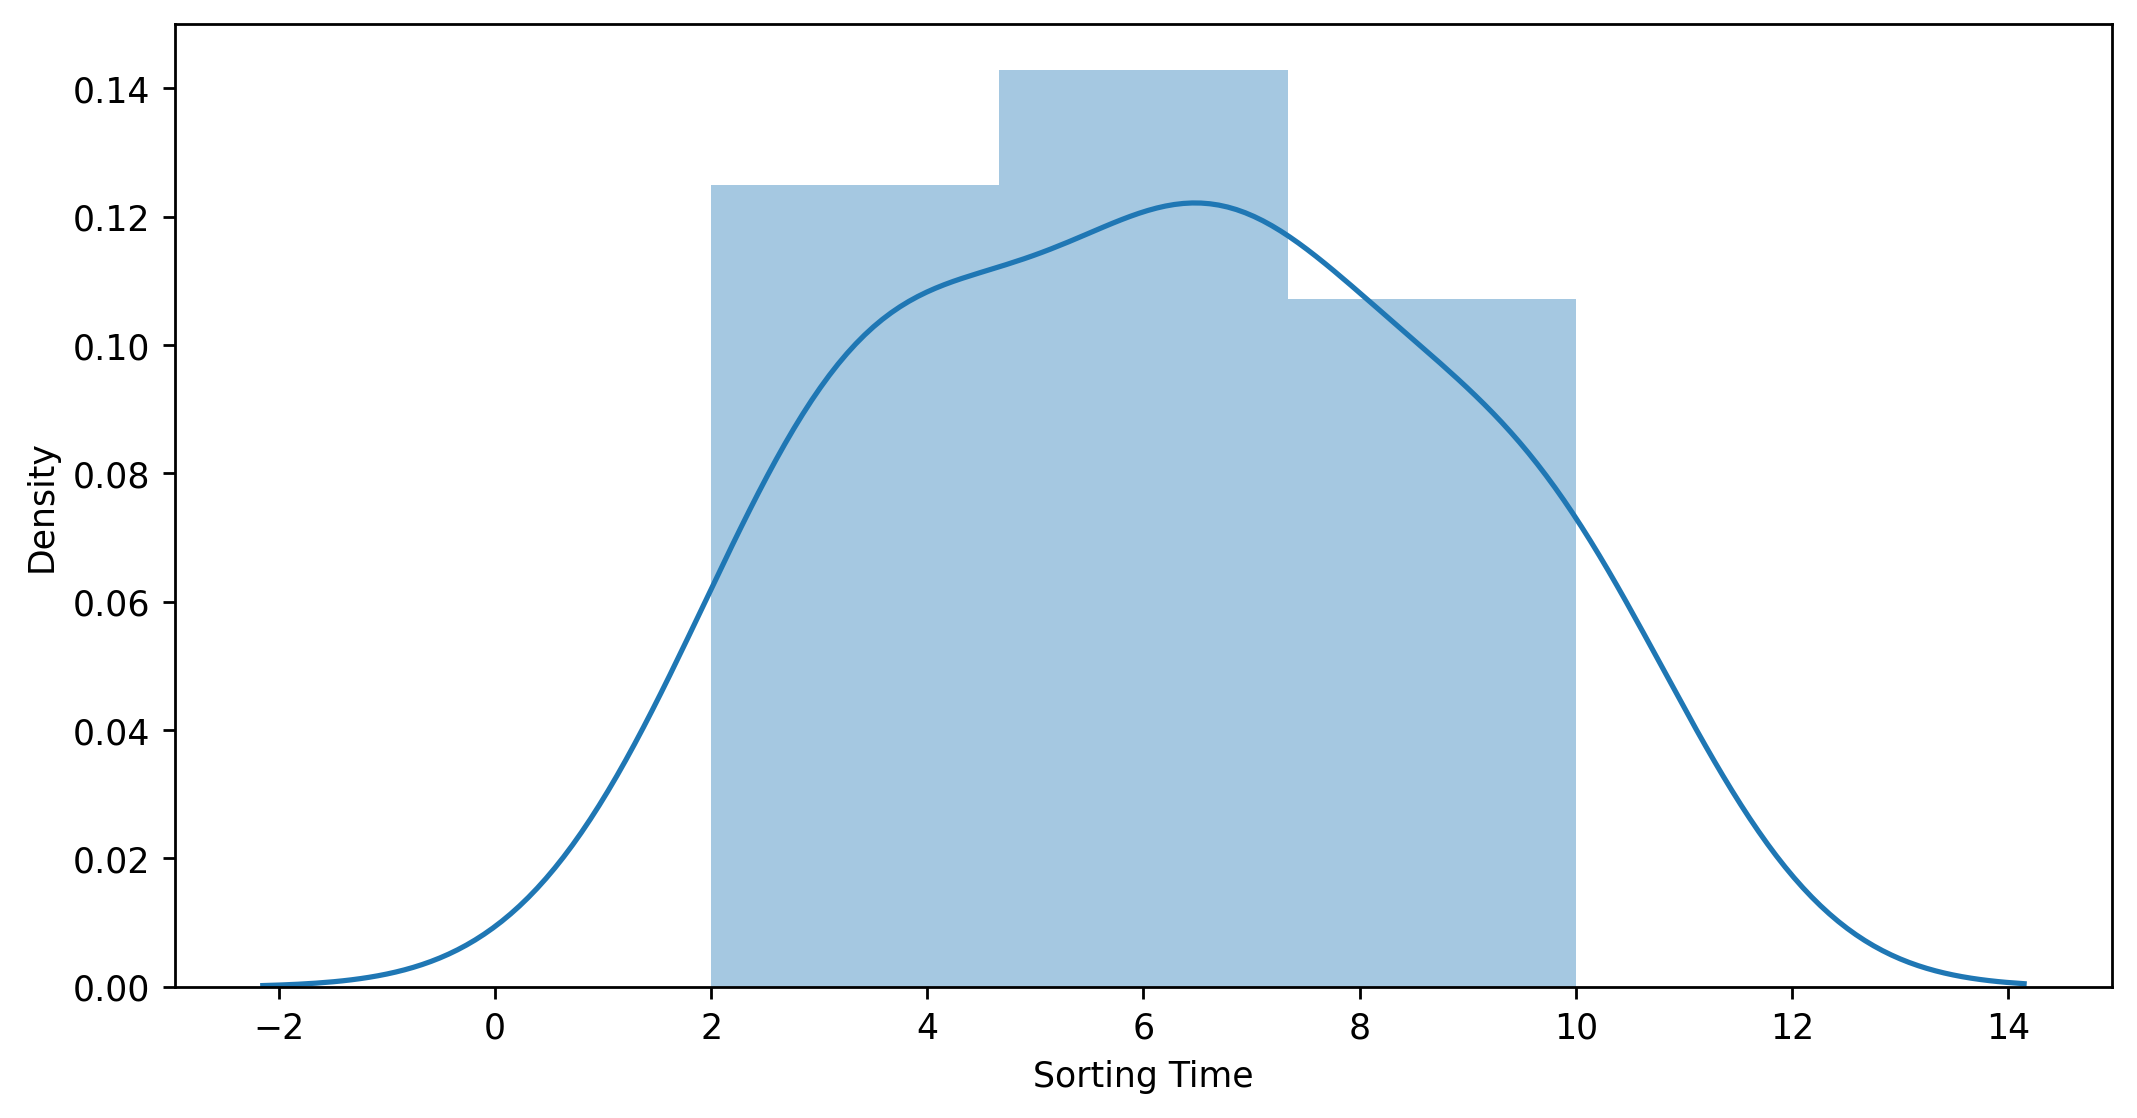

In [7]:
sns.distplot(df['Sorting Time'])

<Axes: >

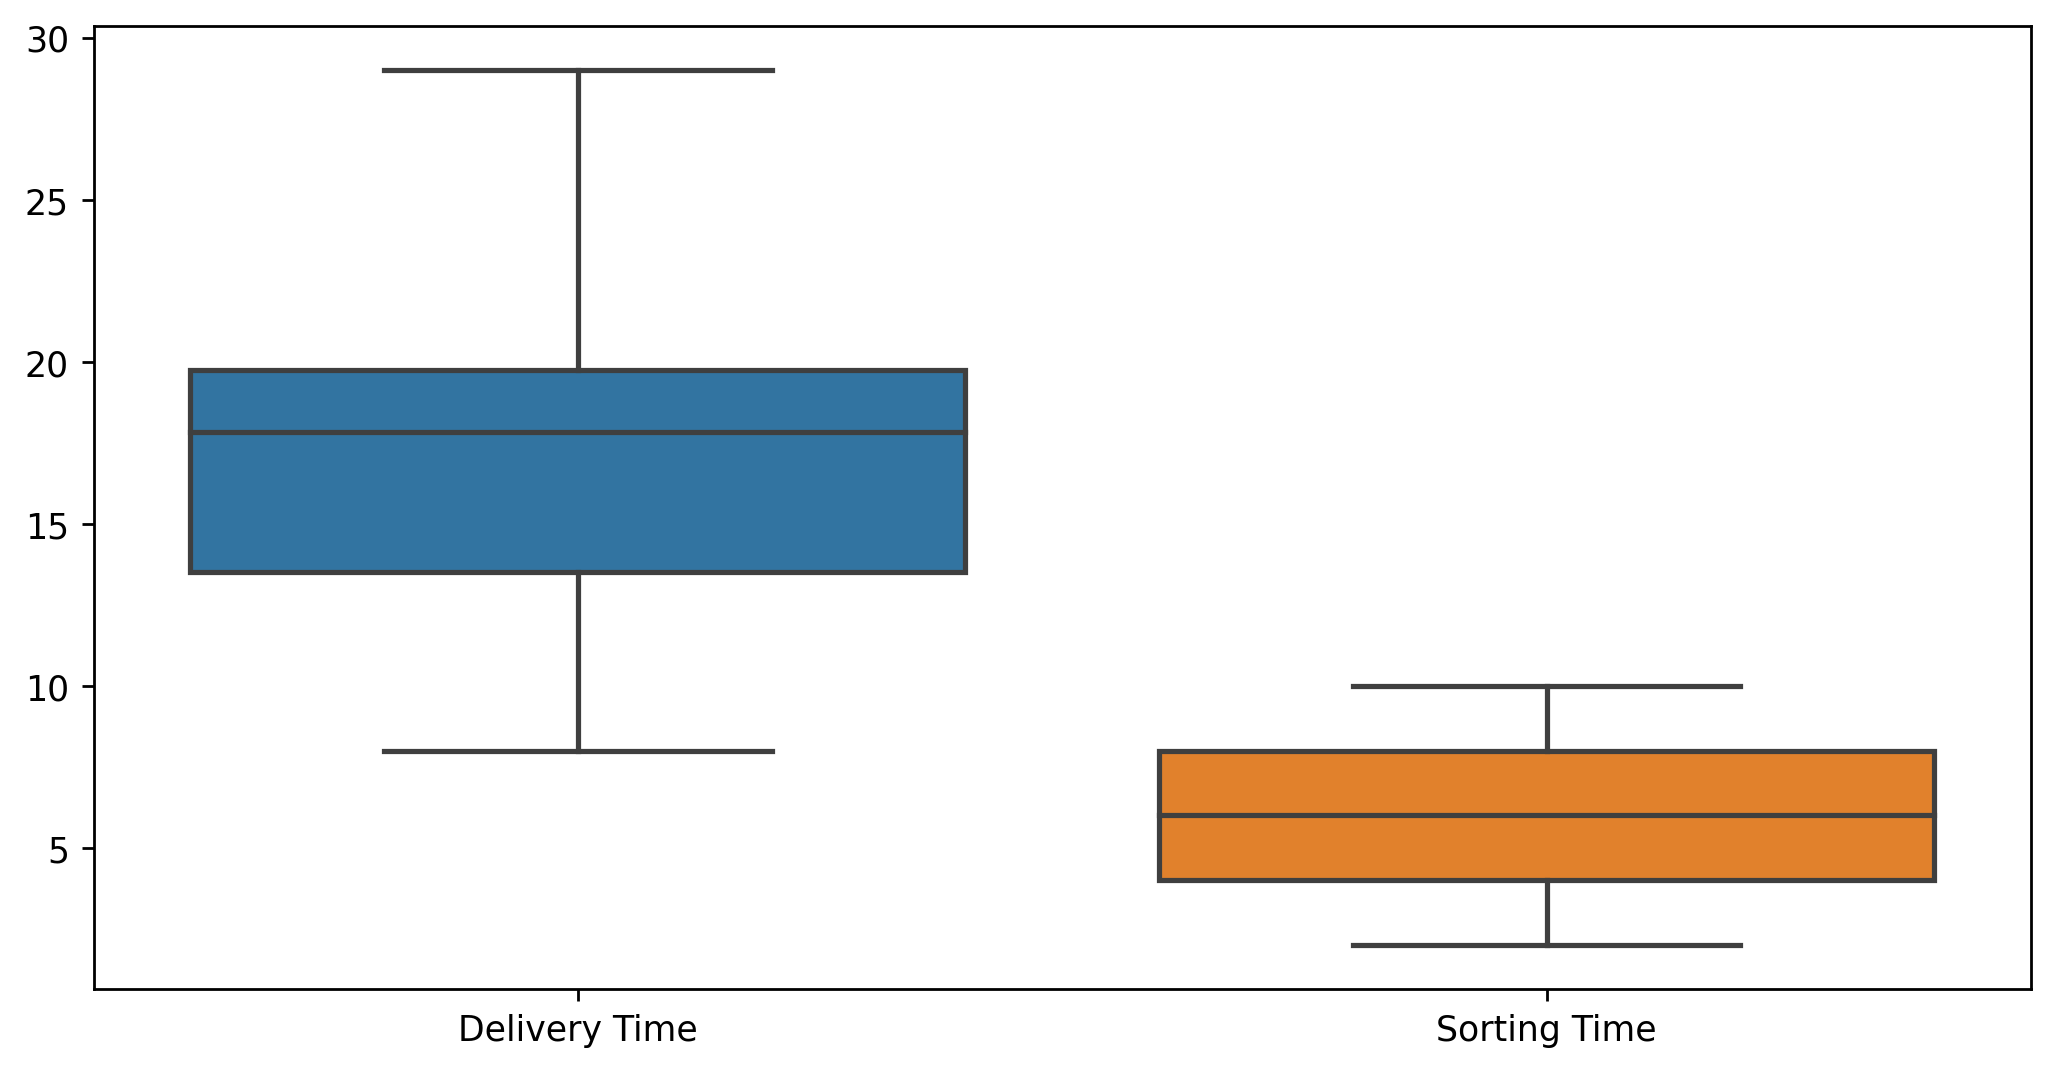

In [8]:
sns.boxplot(df)

In [9]:
# Both the data variables do not have presence of outliers
# sorting Time is normally distributed
# Delivery Time is moderately skewed to the left(mean < median)
df['Delivery Time'].skew()

0.3523900822831107

In [10]:
df['Sorting Time'].skew()

0.047115474210530174

In [11]:
# Normally distributed

In [12]:
df.duplicated().sum()

0

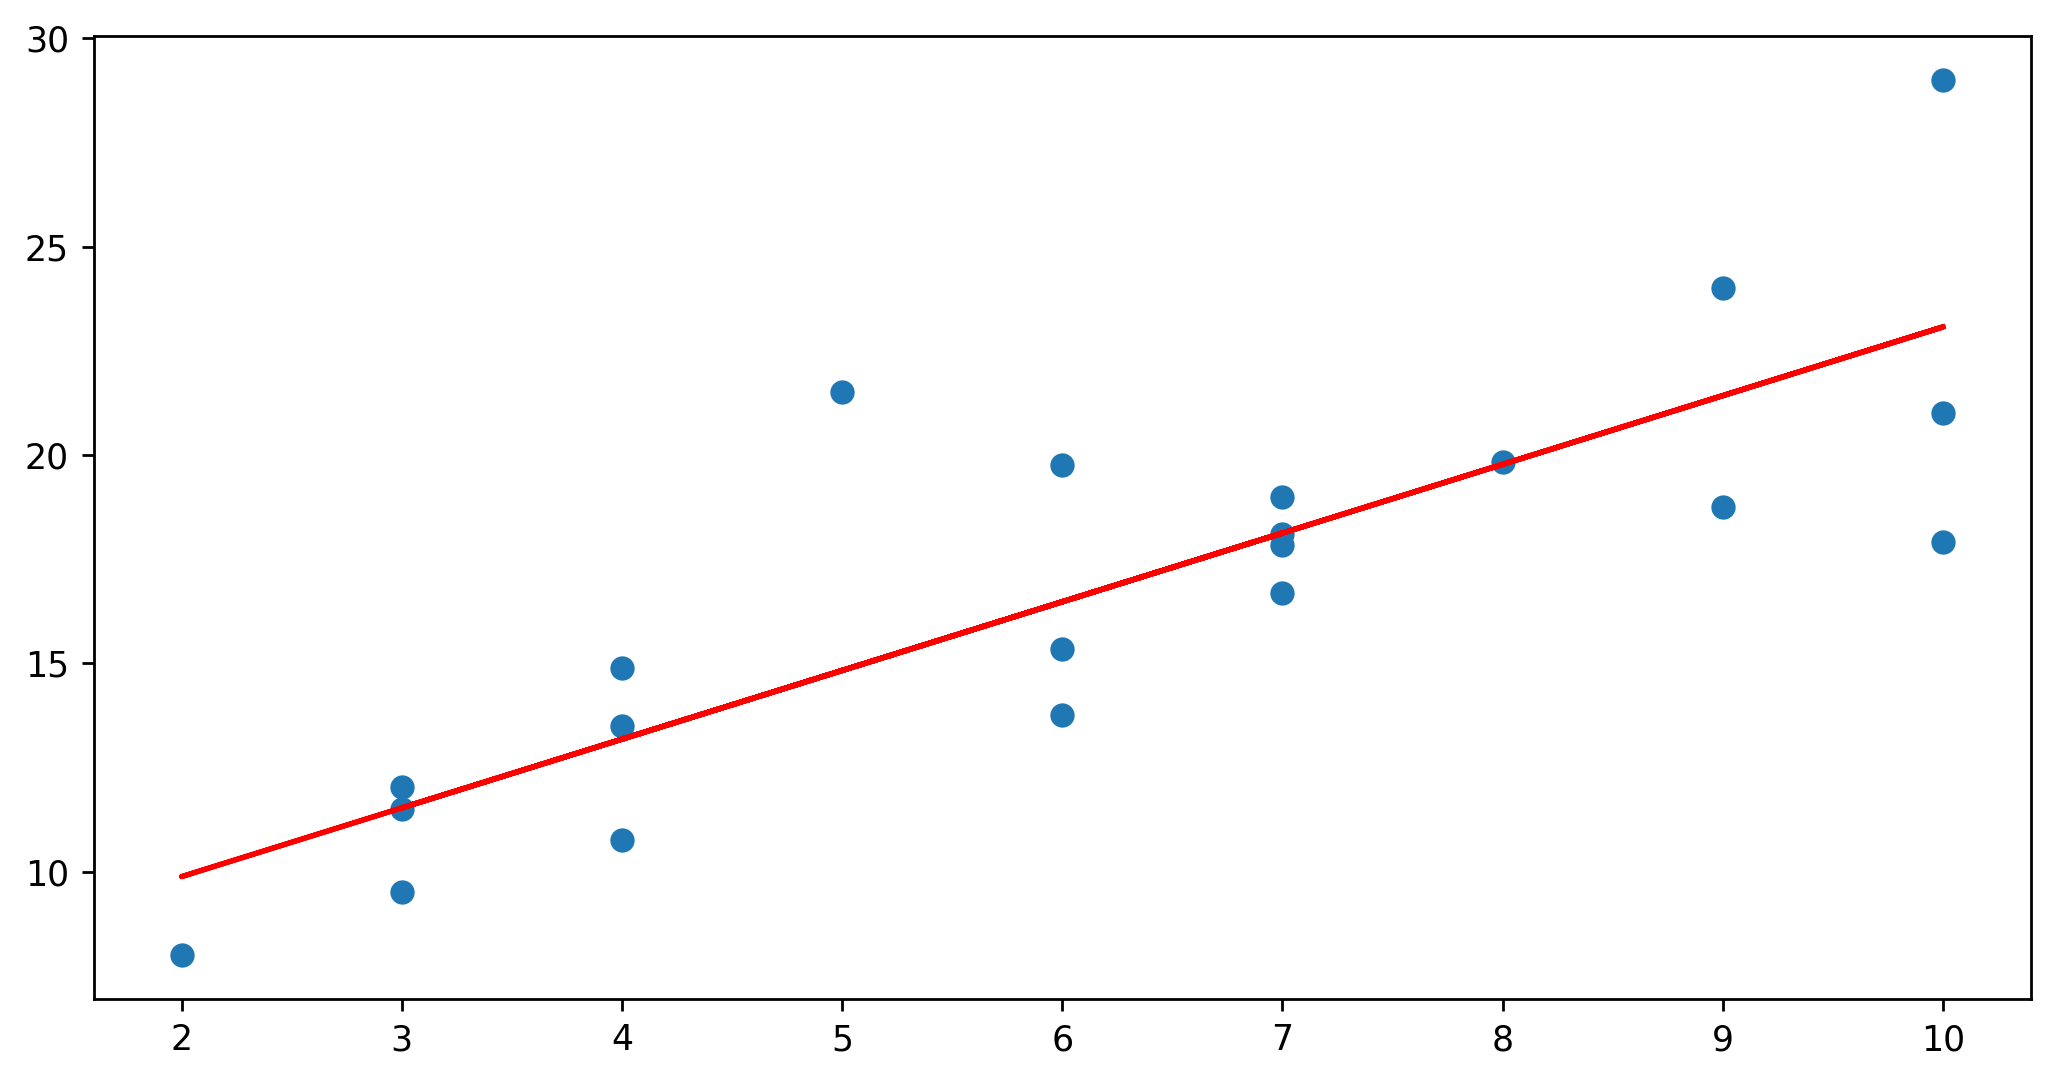

In [13]:
plt.scatter(df['Sorting Time'],df['Delivery Time'])
z = np.polyfit(df['Sorting Time'],df['Delivery Time'],1)
p = np.poly1d(z)
plt.plot(df['Sorting Time'], p(df['Sorting Time']), color = 'red')

In [14]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

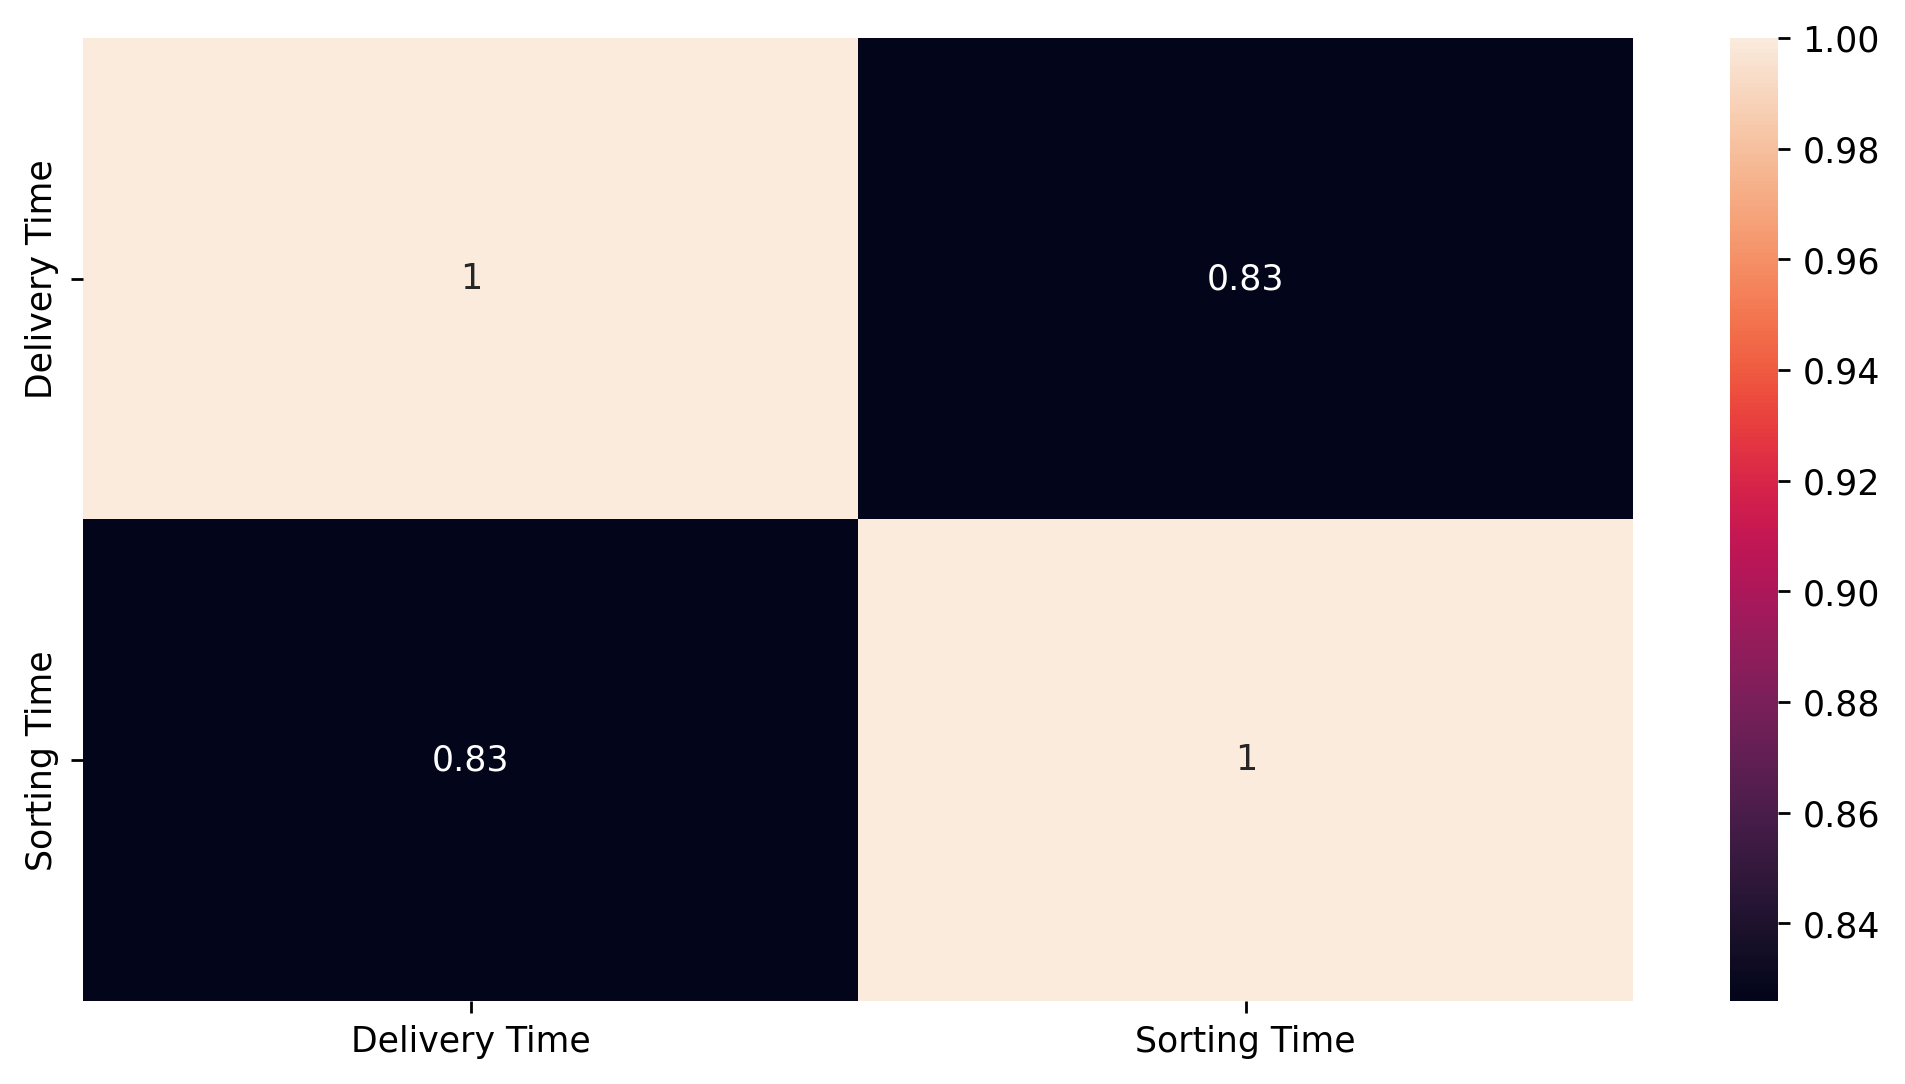

In [15]:
sns.heatmap(df.corr(), annot = True)

In [16]:
# From the graph we can see that Delivery Time has a positive relationship with Sorting Time
# Sorting time increases Delivery time also increases (Linearly related)
# The magnitude of relationship is strong .83

In [17]:
#Model Building

import statsmodels.formula.api as smf

In [18]:
df.rename(columns = {'Sorting Time' : 'sorting'}, inplace = True)
df.rename(columns = {'Delivery Time' : 'delivery'}, inplace = True)
df

,delivery,sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
df['log_delivery'] = np.log(df['delivery'])
df['log_sorting'] = np.log(df['sorting'])
df

,delivery,sorting,log_delivery,log_sorting
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


In [20]:
model = smf.ols('log_delivery~log_sorting', data = df).fit()
model

In [21]:
model.params

Intercept      1.741987
log_sorting    0.597522
dtype: float64

In [22]:
# Accuracy of model
model.rsquared_adj

0.7601698413355158

In [23]:
# Prediction of new data

In [24]:
test = pd.DataFrame({
    'log_sorting' : [12,8,3,5,4,6]
})

In [25]:
model.predict(test)

0    8.912255
1    6.522166
2    3.534554
3    4.729599
4    4.132076
5    5.327121
dtype: float64

In [26]:
# The accuracy is not good as expected it might be due to the insufficient features to predict the delivery time

In [27]:
y = df[['log_delivery']]
y

,log_delivery
0,3.044522
1,2.602690
2,2.983153
3,3.178054
4,3.367296
5,2.731115
6,2.944439
7,2.251292
8,2.884801
9,2.931194


In [28]:
x = df[['log_sorting']]
x

,log_sorting
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585
5,1.791759
6,1.945910
7,1.098612
8,2.302585
9,2.197225


In [29]:
 from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train, y_train)

LinearRegression()

In [34]:
m, c = model.coef_, model.intercept_
m,c

(array([[0.65309094]]), array([1.67821087]))

In [35]:
ypred = pd.DataFrame(model.predict(x_test), columns = ['predict'])
ypred

,predict
0,3.182008
1,2.949067
2,2.583587
3,2.583587
4,3.182008
5,2.848393
6,2.583587


In [36]:
y_test

,log_delivery
0,3.044522
17,2.896464
15,2.700018
1,2.602690
8,2.884801
5,2.731115
11,2.374906


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
np.sqrt(mean_squared_error(y_test,ypred))

0.16090136685501794

In [39]:
r2_score(y_test,ypred)

0.3784798798239457

In [40]:
# Q2

In [41]:
data = pd.read_csv(r"C:\Users\ahmed\Downloads\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [42]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [43]:
data.rename(columns = {'YearsExperience' : 'exp'}, inplace = True)
data.rename(columns = {'Salary' : 'sal'}, inplace = True)
data

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: xlabel='exp', ylabel='Density'>

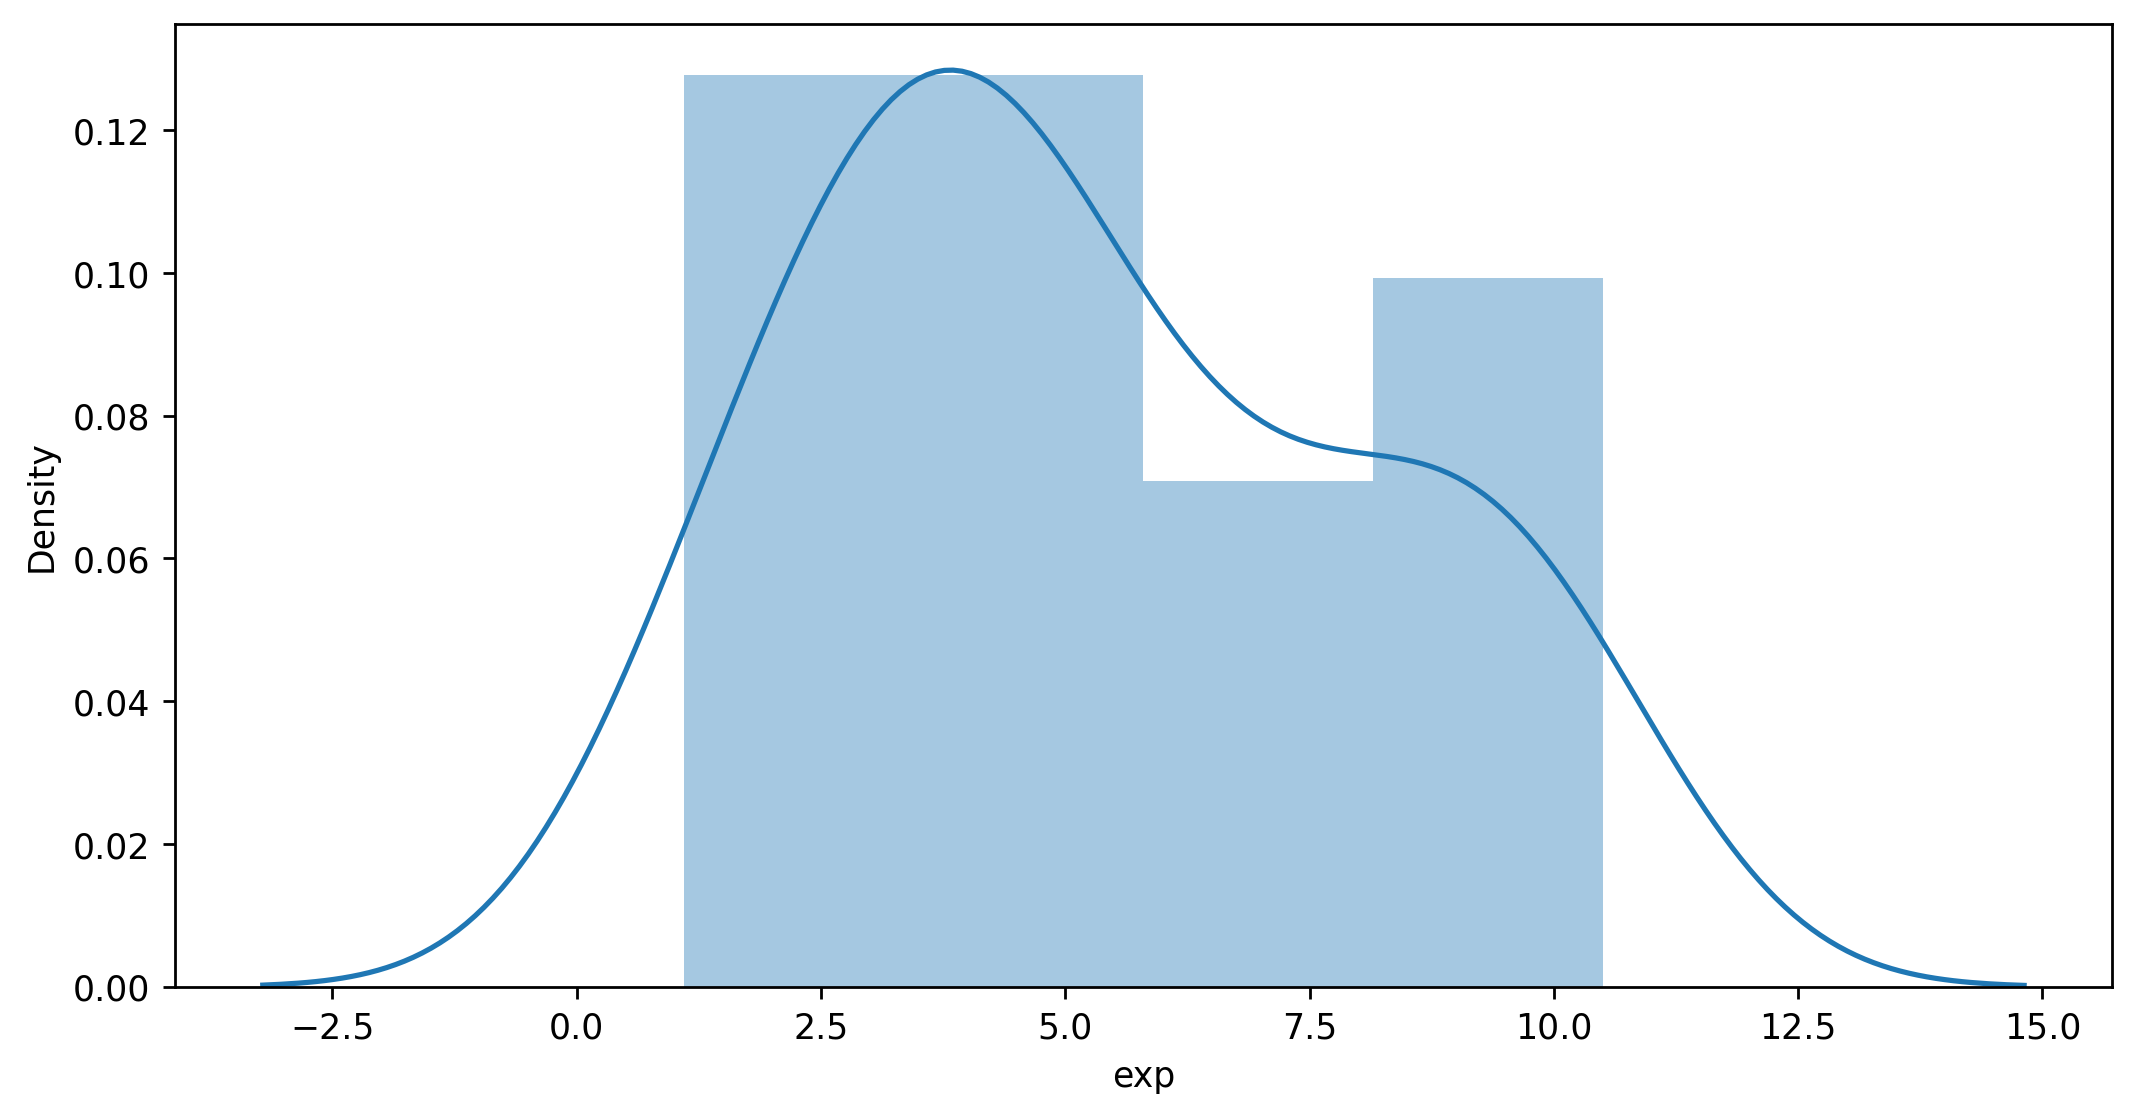

In [44]:
sns.distplot(data['exp'])

<Axes: xlabel='sal', ylabel='Density'>

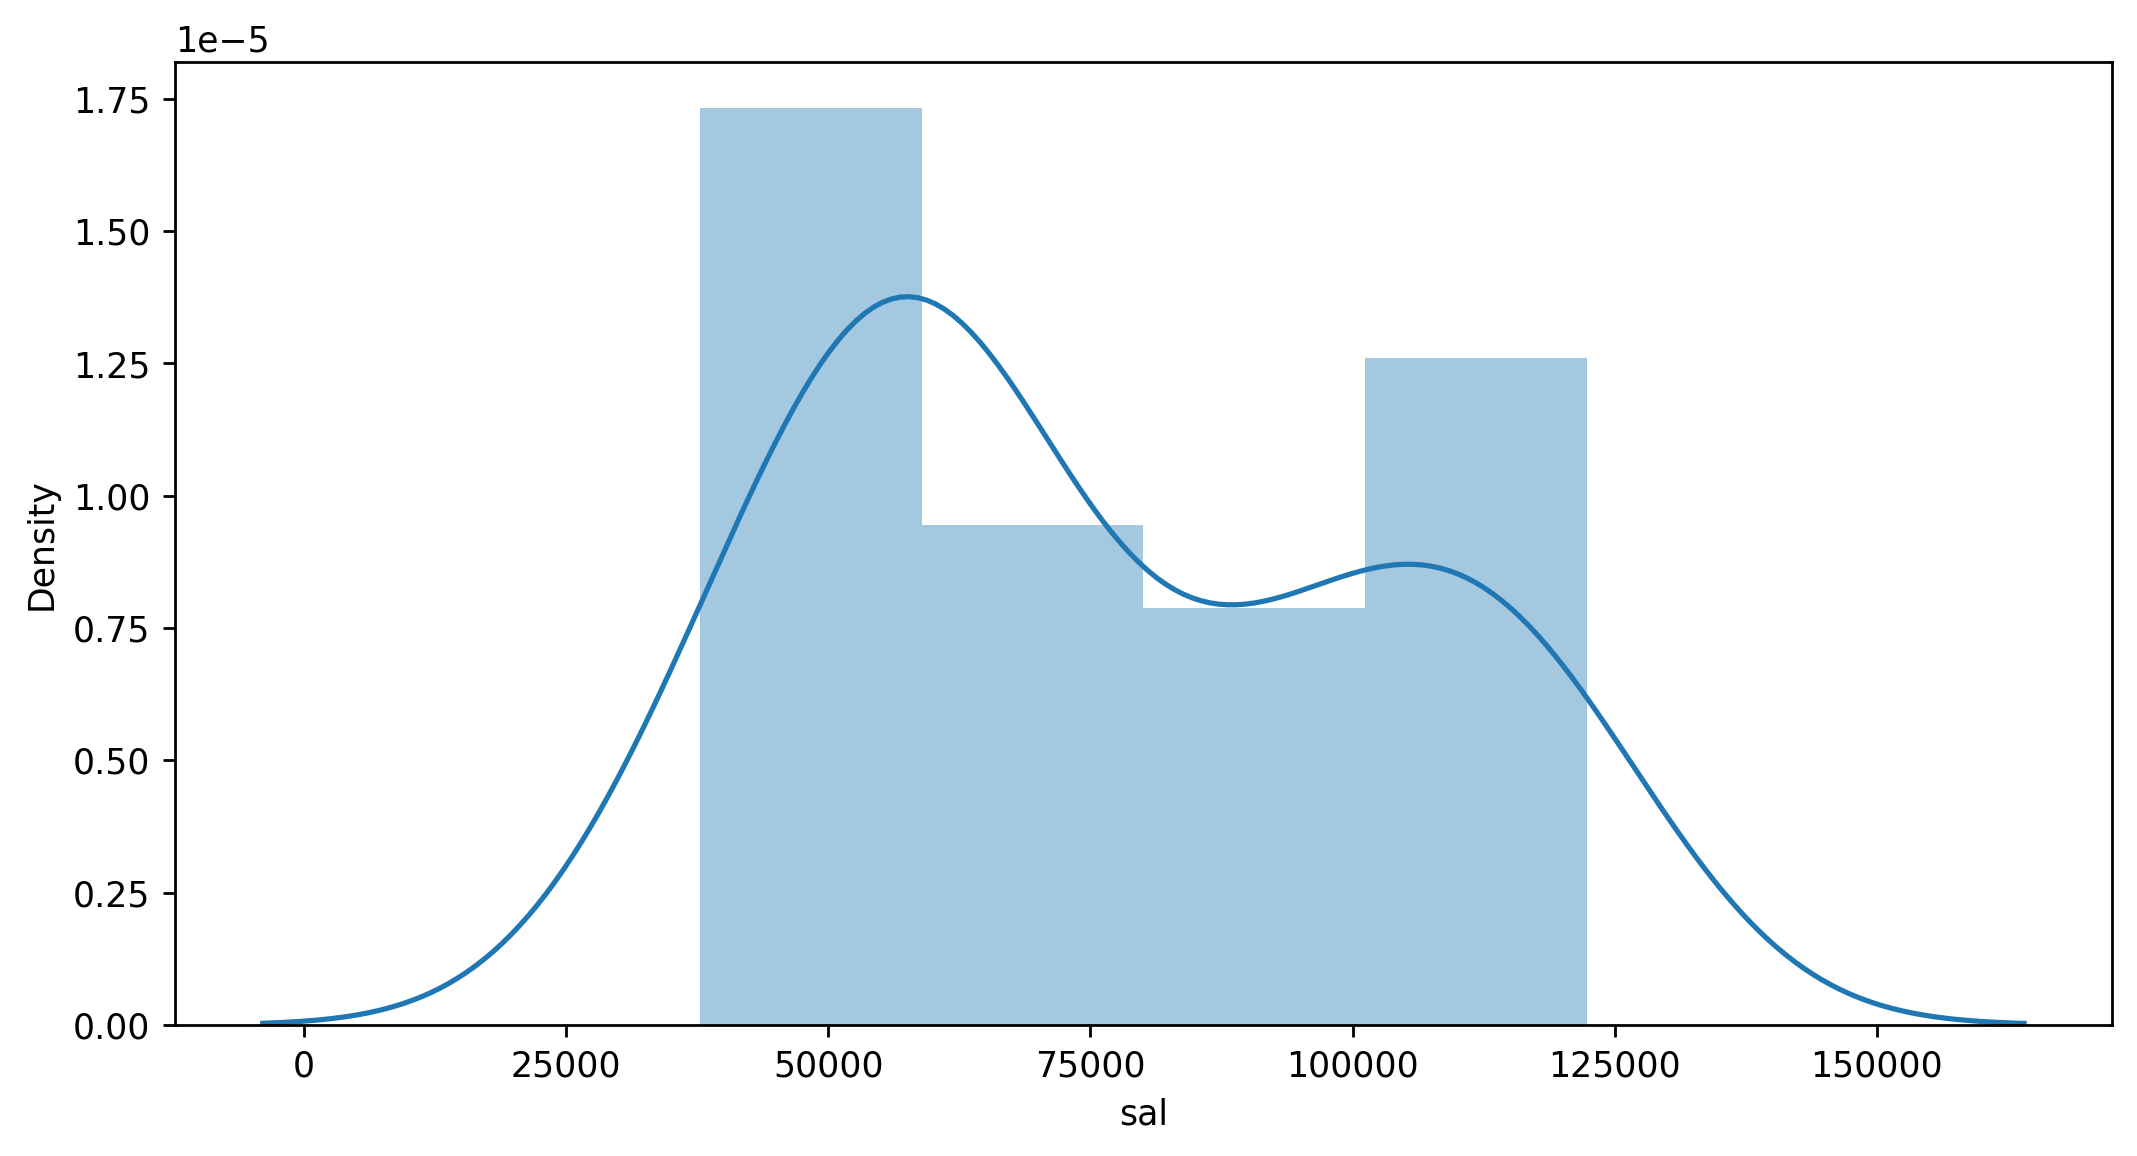

In [45]:
sns.distplot(data['sal'])

In [46]:
data['exp'].skew()

0.37956024064804106

In [47]:
data['sal'].skew()

0.35411967922959153

In [48]:
#Both the columns are normally distributed

<Axes: >

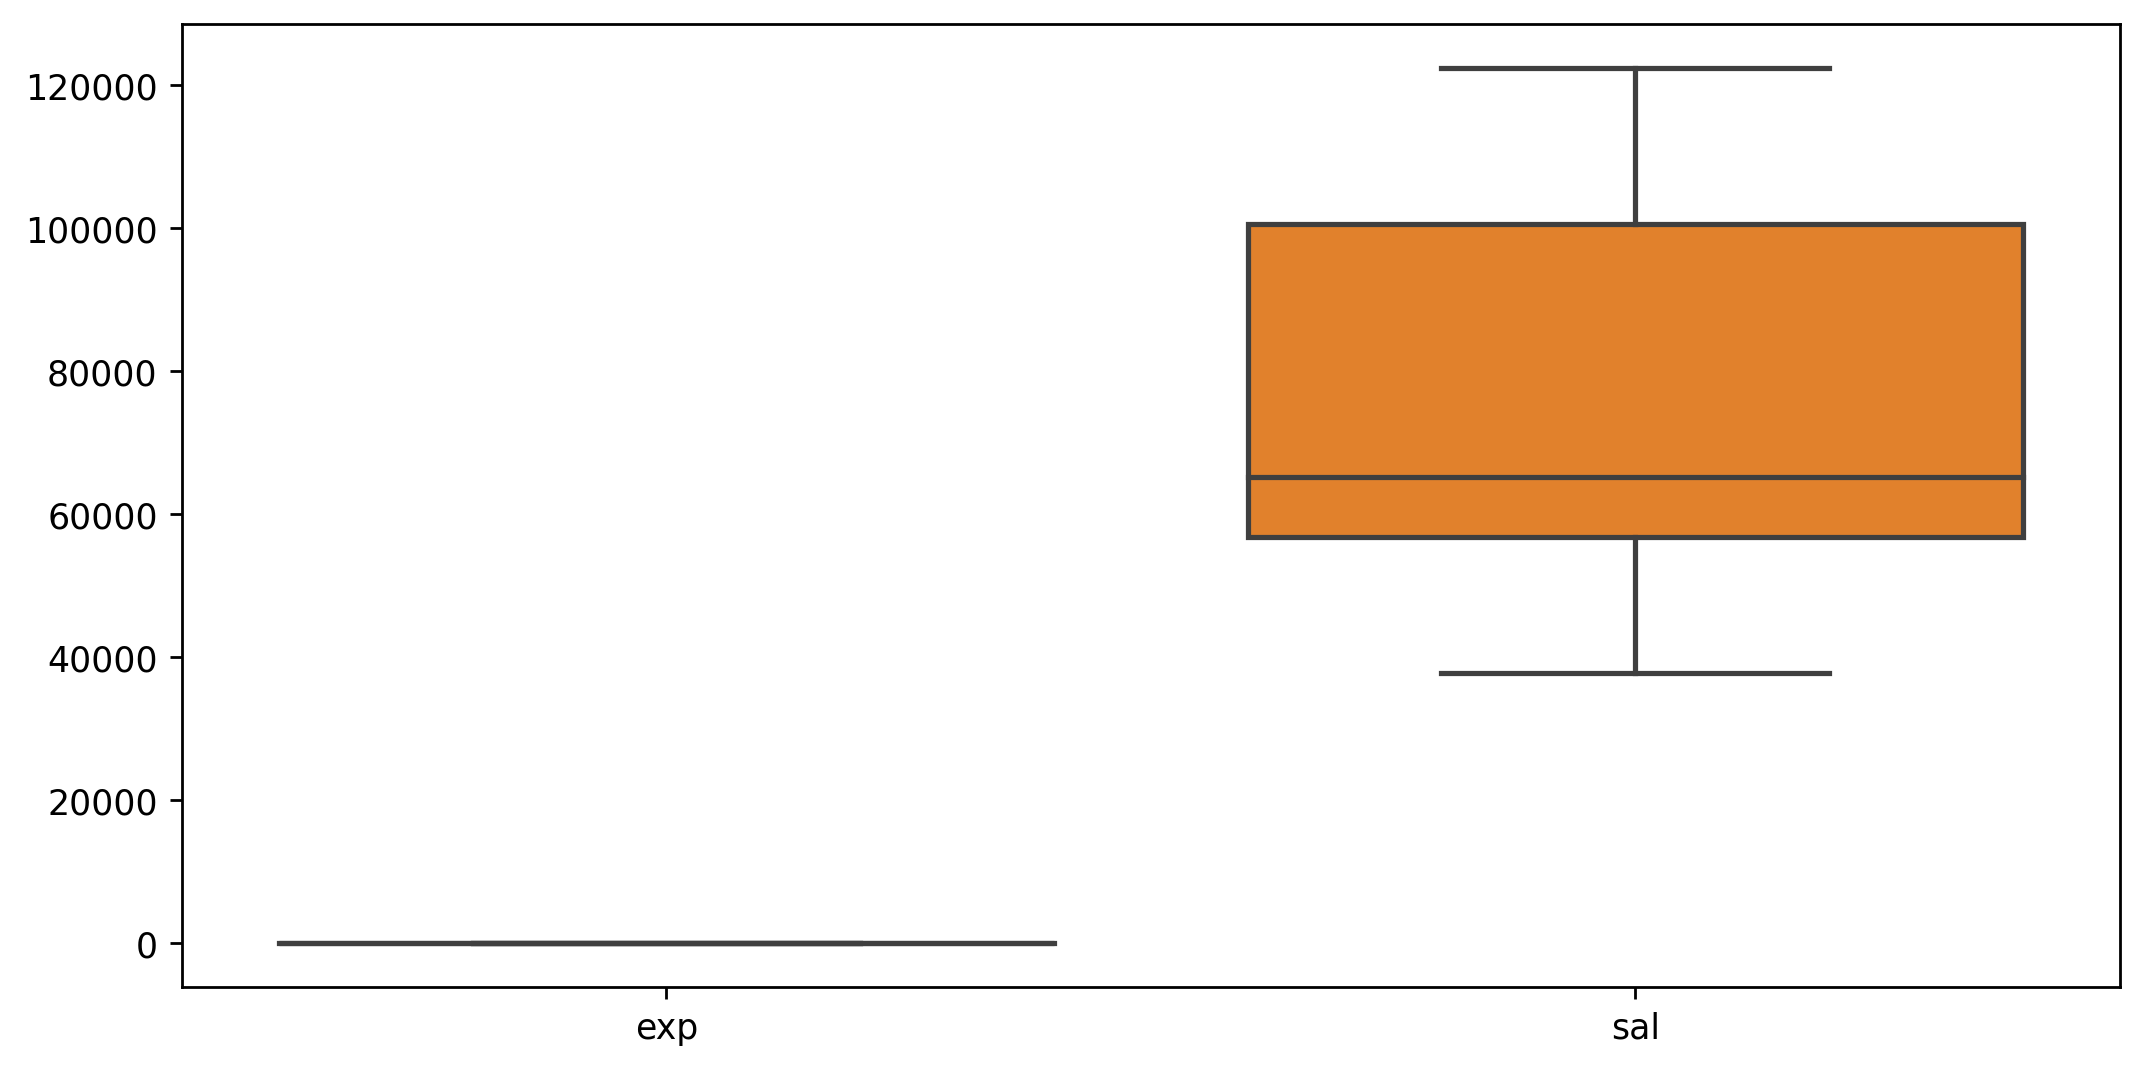

In [49]:
sns.boxplot(data)

In [50]:
# The range of years of experience is really small
# Both the columns are free of outliers

In [51]:
data['exp'].head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: exp, dtype: float64

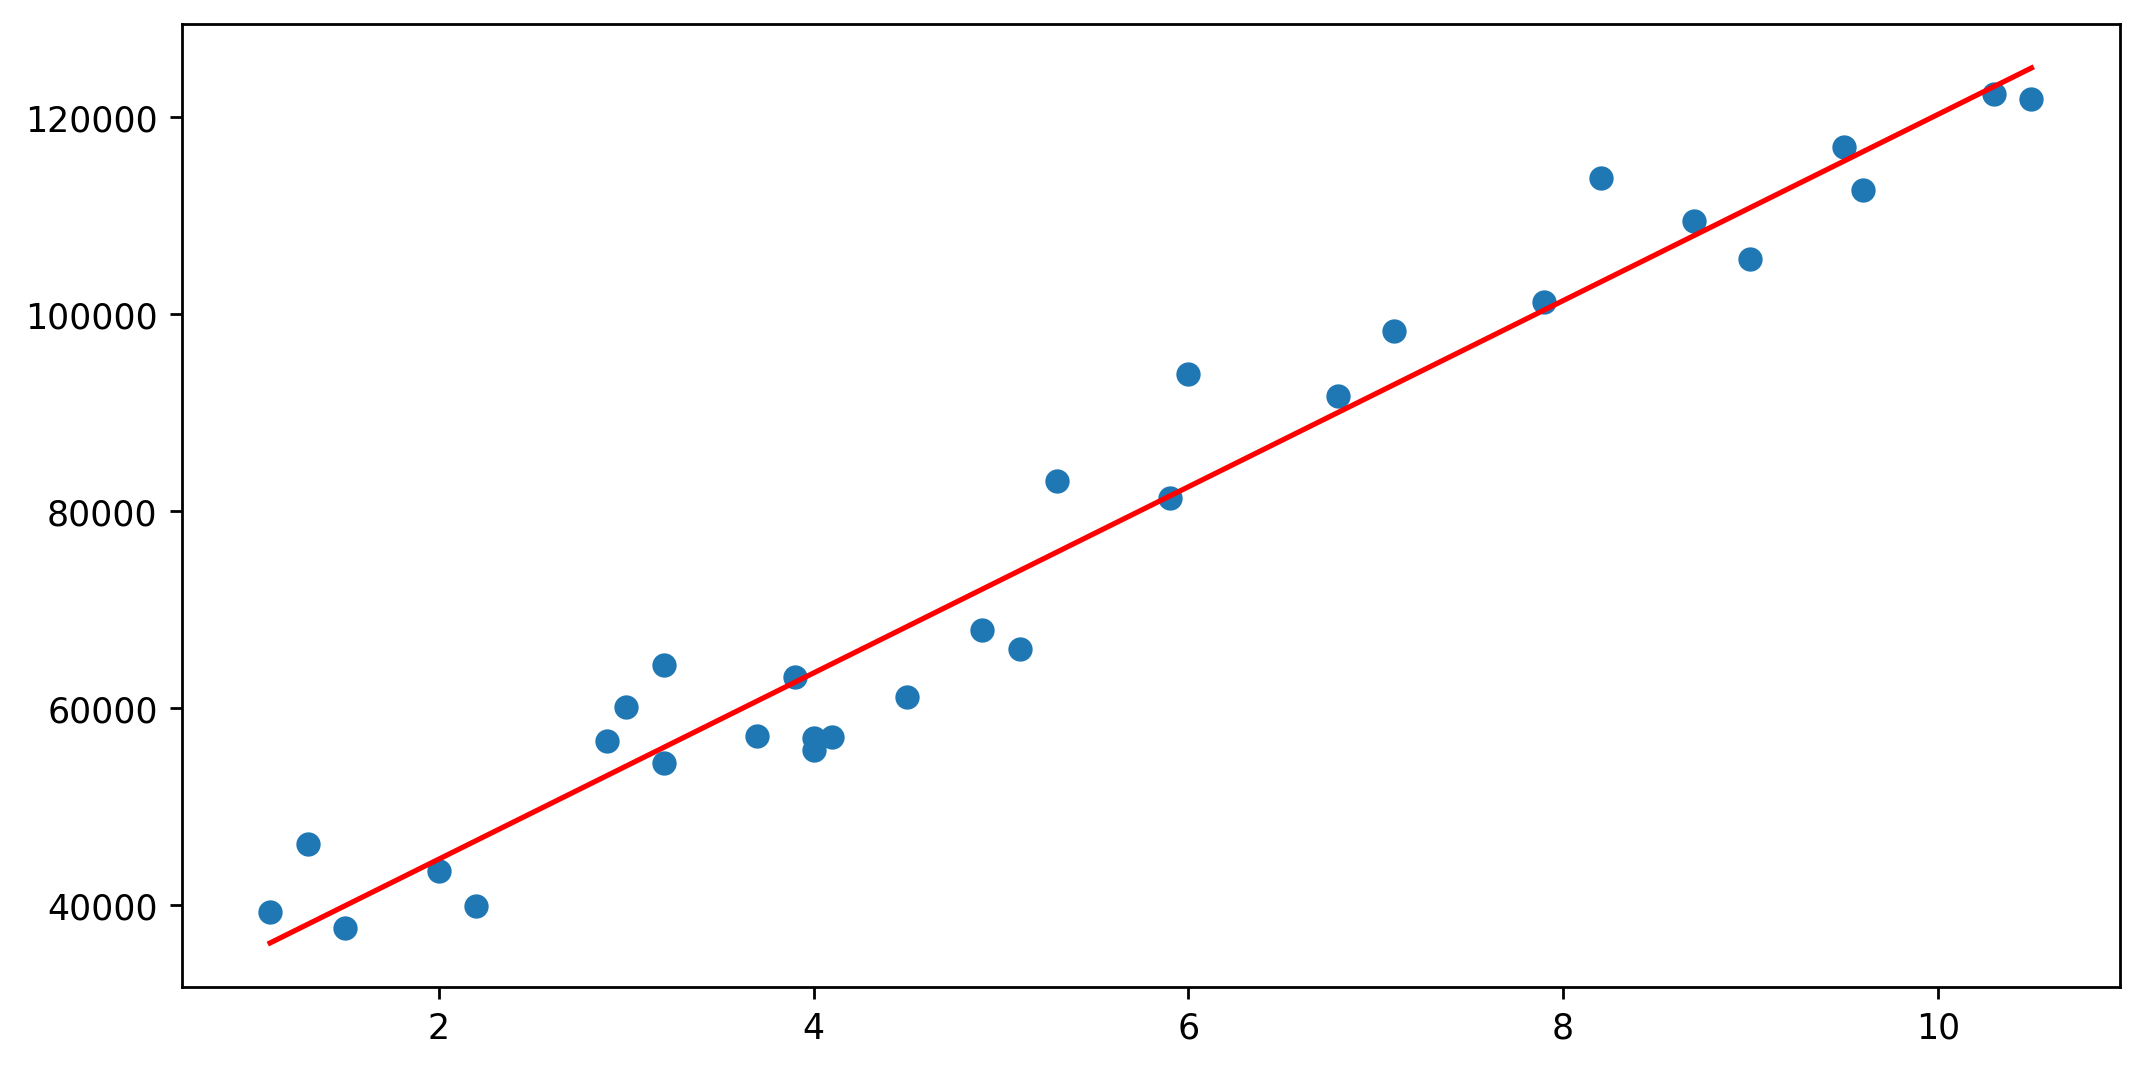

In [52]:
plt.scatter(data['exp'],data['sal'])
z = np.polyfit(data['exp'],data['sal'],1)
p = np.poly1d(z)
plt.plot(data['exp'], p(data['exp']), color = 'red')

In [53]:
#The graph shows a strong positive relationship

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exp     30 non-null     float64
 1   sal     30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [55]:
data.duplicated().sum()

0

<Axes: >

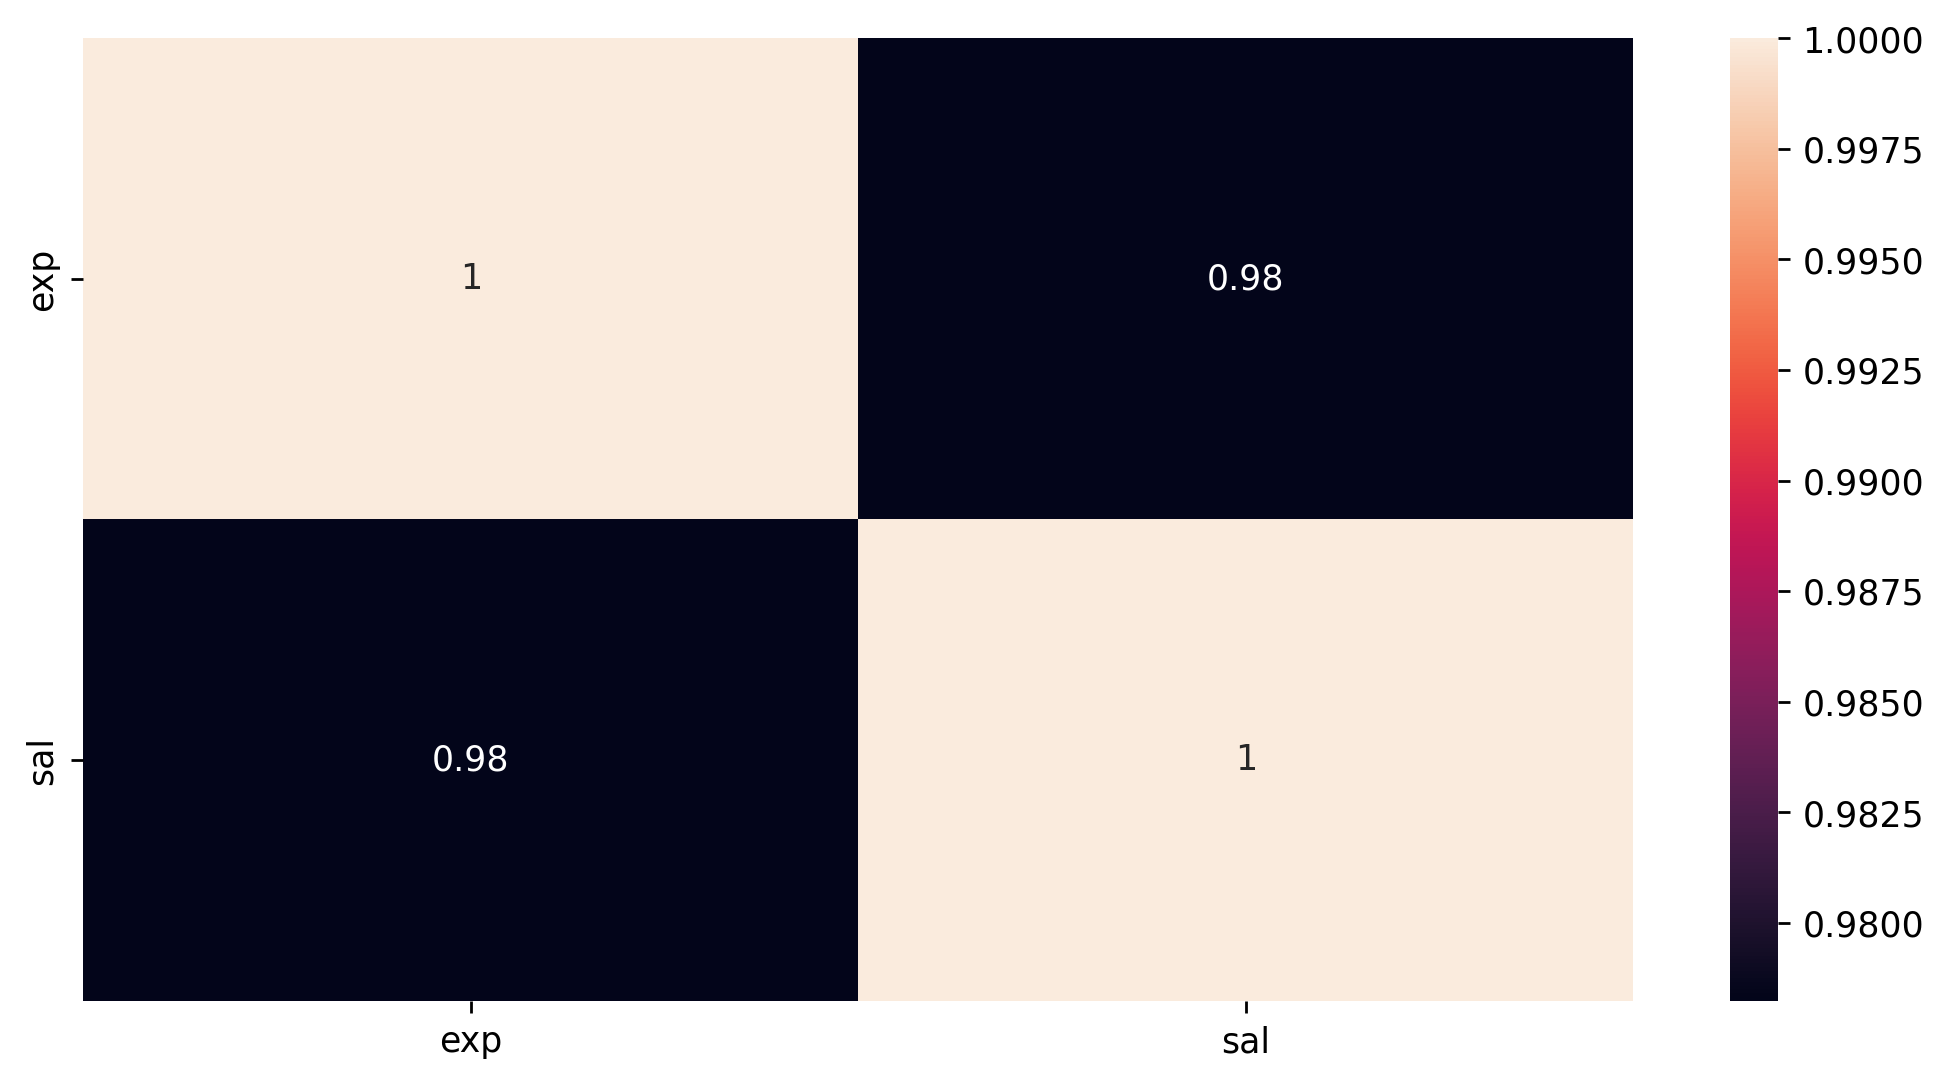

In [56]:
sns.heatmap(data.corr(), annot = True)

In [57]:
# The magnitude of relationship highly strong 0.98

In [58]:
# Model Building

In [59]:
model = smf.ols('sal~exp', data = data).fit()
model

In [60]:
model.params

Intercept    25792.200199
exp           9449.962321
dtype: float64

In [61]:
data.head()

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [62]:
# Predicting for new data values
YOE = pd.DataFrame({'exp' : [1.3,2.1,3,2,5,1.5]
                    })

In [63]:
YOE

,exp
0,1.3
1,2.1
2,3.0
3,2.0
4,5.0
5,1.5


In [64]:
model.predict(YOE)

0    38077.151217
1    45637.121074
2    54142.087163
3    44692.124842
4    73042.011806
5    39967.143681
dtype: float64

In [65]:
model.rsquared_adj

0.9554194021486339

In [ ]:
# The Accuracy of the model is good.